In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
import random
import seaborn as sns

In [2]:
#Load Data
march_madness = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/15f210532b2a642e85738ddefa7a2945d47e2585/ncaa-womens-basketball-tournament/ncaa-womens-basketball-tournament-history.csv', delimiter=',')

In [3]:
march_madness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092 entries, 0 to 2091
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               2092 non-null   int64  
 1   School             2092 non-null   object 
 2   Seed               2092 non-null   object 
 3   Conference         2092 non-null   object 
 4   Conf. W            2092 non-null   object 
 5   Conf. L            2092 non-null   object 
 6   Conf. %            2092 non-null   object 
 7   Conf. place        2092 non-null   object 
 8   Reg. W             2092 non-null   int64  
 9   Reg. L             2092 non-null   int64  
 10  Reg. %             2092 non-null   float64
 11  How qual           2092 non-null   object 
 12  1st game at home?  2092 non-null   object 
 13  Tourney W          2092 non-null   int64  
 14  Tourney L          2092 non-null   int64  
 15  Tourney finish     2092 non-null   object 
 16  Full W             2092 

In [4]:
#target will be tourney wins
#change how qual and 1st game at home to binary

In [5]:
drop_cols = ['Year', 'School', 'Full W', 'Full L', 'Full %','Conf. %','Conf. place', 'Tourney finish','Tourney L', 'Reg. %']
mm = march_madness.drop(columns = drop_cols, axis=1)


In [6]:
#Change conference column to binary Power 5 variable

Power_Five = ['Atlantic Coast', 'Big Ten', 'Big 12', 'Pacific-10', 'Pac-12', 'Southeastern']

mm['Power_Five_Conference'] = mm['Conference'].isin(Power_Five).astype(int)

mm = mm.drop(columns = 'Conference', axis=1)

In [7]:
#Change 'First game at home?' to binary

mm['1st game at home?'] = mm['1st game at home?'].map({'Y': 1, 'N': 0})

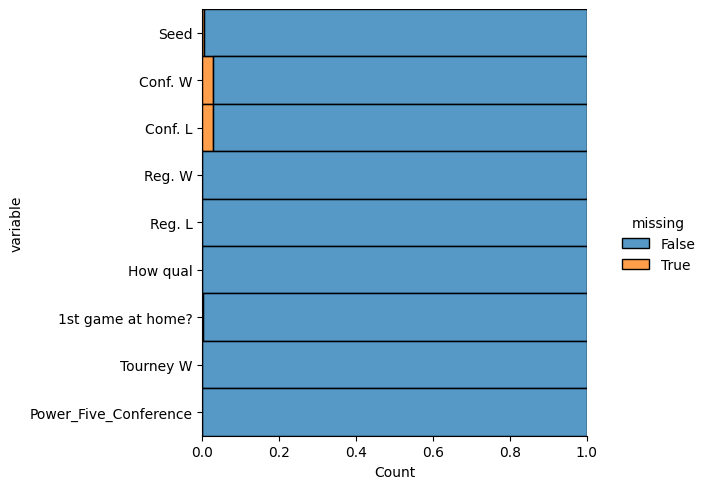

In [8]:
#Check NaN

mm.replace('-', np.nan, inplace=True)
mm.replace('(OR)', np.nan, inplace=True)

sns.displot(
    data=mm.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)

In [9]:
mm['Seed'] = pd.to_numeric(mm['Seed'])
mm['Conf. W'] = pd.to_numeric(mm['Conf. W'])
mm['Conf. L'] = pd.to_numeric(mm['Conf. L'])

mm['How qual'] = mm['How qual'].astype('category')

In [10]:
#Drop NAs

mm_no_na = mm.dropna()

In [12]:
#One hot encode 'How qual'

wom_tourney = pd.get_dummies(mm_no_na)
wom_tourney.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2025 entries, 3 to 2091
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Seed                   2025 non-null   float64
 1   Conf. W                2025 non-null   float64
 2   Conf. L                2025 non-null   float64
 3   Reg. W                 2025 non-null   int64  
 4   Reg. L                 2025 non-null   int64  
 5   1st game at home?      2025 non-null   float64
 6   Tourney W              2025 non-null   int64  
 7   Power_Five_Conference  2025 non-null   int32  
 8   How qual_at-large      2025 non-null   bool   
 9   How qual_auto          2025 non-null   bool   
dtypes: bool(2), float64(4), int32(1), int64(3)
memory usage: 138.4 KB


In [15]:
wom_tourney['How qual_at-large'] = wom_tourney['How qual_at-large'].astype(int)
wom_tourney['How qual_auto'] = wom_tourney['How qual_auto'].astype(int)

In [16]:
#Change Tourney W to ROund Reached

wom_tourney.rename(columns={'Tourney W': 'Round Reached'}, inplace=True)

# Add 1 to every value in the 'Round Reached' column
wom_tourney['Round Reached'] += 1